In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_unnormalized = 'communities_and_crime_unnormalized/CommViolPredUnnormalizedData.txt'
data = pd.read_csv(data_unnormalized, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
attribute_names = []
with open('communities_and_crime_unnormalized/attribute_names.txt','r') as f:
    t = f.readlines()
    for x in t:
        attribute_names.append(x.split(' ')[1])
        
print (attribute_names)

['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLa

In [4]:
data.columns = attribute_names
data.head()

,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [5]:
data.replace('?',np.nan,inplace = True)

In [6]:
goal_variable = 'violentPerPop'
sum(data[goal_variable].isna())

221

Since there are 221 missing values in the target variable, we are going to drop these 221 instances.

In [7]:
indexes = data[goal_variable].isna()
indexes = np.where(indexes==True)

data.drop(indexes[0], axis = 0, inplace = True)
data.shape

(1994, 147)

Dropping other goal variables

In [8]:
other_goal_variables = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults',
                        'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
                        'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'nonViolPerPop']

len(other_goal_variables)

17

In [9]:
data.drop(other_goal_variables, axis = 1, inplace = True)
data.shape

(1994, 130)

In [10]:
data.reset_index(inplace = True)
data.head()


,index,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,...,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,violentPerPop
0,0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,...,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,41.02
1,1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,...,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,127.56
2,2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,...,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,218.59
3,3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,...,5.2,3217.7,3.31,NaN,NaN,NaN,NaN,0.0,NaN,306.64
4,5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,...,70.4,1995.7,0.97,NaN,NaN,NaN,NaN,0.0,NaN,442.95


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
data[goal_variable] = data[goal_variable].astype(np.float64)

In [13]:
m = np.min(data[goal_variable])
M = np.max(data[goal_variable])

data[goal_variable] = data[goal_variable].apply(lambda x: (x-m)/(M-m))

In [14]:
true_ys = data[goal_variable].values.copy()

## Visualizing Target Variable

In [15]:
data[goal_variable] = data[goal_variable].astype(np.float64)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


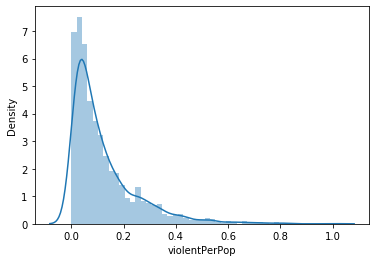

In [16]:
sns.distplot(data[goal_variable])
plt.show()

Descriptive statistics of the target variable

In [17]:
from scipy import stats

y = np.array(data[goal_variable].values, dtype = np.float32)
descriptive = {}

descriptive['min'] = np.min(y)
descriptive['max'] = np.max(y)

descriptive['mean'] = np.mean(y)
descriptive['std'] = np.std(y)
descriptive['median'] = np.median(y)
descriptive['Skewness'] = stats.skew(y)
descriptive['Kurtosis'] = stats.kurtosis(y)

count = 0
l1 = descriptive['mean'] - 3*descriptive['std']
l2 = descriptive['mean'] + 3*descriptive['std']
for value in y:
    if l1<=value<=l2:
        count+=1
        
descriptive['Percentage_within_3_sd'] = count/len(y) * 100

descriptive

{'min': 0.0,
 'max': 1.0,
 'mean': 0.12078567,
 'std': 0.12602477,
 'median': 0.07669785,
 'Skewness': 2.0653159618377686,
 'Kurtosis': 5.579642948884782,
 'Percentage_within_3_sd': 97.89368104312939}

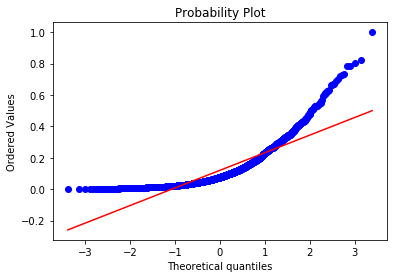

In [18]:
stats.probplot(y, plot = plt)
plt.show()

## Handling missing values

In [19]:
missing_values = {}
n = data.shape[0]
for variable in data.columns:
    missing = sum(data[variable].isna())
    if missing >  0:
        missing_values[variable] = missing/n * 100
        
missing_values = dict(sorted(missing_values.items(), key = lambda x:x[1], reverse = True))

missing_values = pd.Series(missing_values)
missing_values

numPolice            84.002006
policePerPop         84.002006
policeField          84.002006
policeFieldPerPop    84.002006
policeCalls          84.002006
policCallPerPop      84.002006
policCallPerOffic    84.002006
policePerPop2        84.002006
racialMatch          84.002006
pctPolicWhite        84.002006
pctPolicBlack        84.002006
pctPolicHisp         84.002006
pctPolicAsian        84.002006
pctPolicMinority     84.002006
officDrugUnits       84.002006
numDiffDrugsSeiz     84.002006
policAveOT           84.002006
policCarsAvail       84.002006
policOperBudget      84.002006
pctPolicPatrol       84.002006
gangUnit             84.002006
policBudgetPerPop    84.002006
communityCode        59.027081
countyCode           58.876630
otherPerCap           0.050150
dtype: float64

There is one variable 'otherPerCap' which has about 5% missing values. 'countyCode' and 'communityCode' has around 59% missing values. There are 22 other variables which have around 84% missing values. Keeping 'otherPerCap' we drop all the other variables as they have significant percentage of missing values.

In [20]:
to_drop = list(missing_values.keys())
#to_drop.remove('otherPerCap')

data.drop(to_drop,axis = 1,inplace = True)
data.shape

(1994, 106)

Checking the variable 'otherPerCap'

In [21]:
numeric_data = data._get_numeric_data()
numeric_data.head()


,index,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,...,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit,violentPerPop
0,0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0.008411
1,1,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0.026155
2,2,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,0.044820
3,3,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,0.062874
4,5,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,...,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,0.090823


In [22]:
non_numeric = list(set(data.columns) - set(numeric_data.columns))
data[non_numeric].head()

,communityname,State
0,BerkeleyHeightstownship,NJ
1,Marpletownship,PA
2,Tigardcity,OR
3,Gloversvillecity,NY
4,Springfieldcity,MO


In [23]:
data.drop(non_numeric, axis = 1, inplace = True)
data.shape

(1994, 104)

In [24]:
data.drop('index',axis = 1, inplace = True)

In [25]:
data.head()

,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,...,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit,violentPerPop
0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0.008411
1,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0.026155
2,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,0.044820
3,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,0.062874
4,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,...,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,0.090823


In [26]:
transform = ['asianPerCap', 'medIncome', 'medFamIncome', 'whitePerCap', 'hispPerCap', 'pctUsePubTrans',
 'persPoverty', 'kidsBornNevrMarr', 'numForeignBorn', 'houseVacant', 'ownHousLowQ', 'ownHousMed', 'ownHousUperQ',
             'landArea', 'persEmergShelt','persHomeless', 'popDensity']

for variable in transform:
    data[variable] = data[variable].apply(lambda x:np.log(x+15))

In [27]:
y = data[goal_variable]
X = data.drop(goal_variable, axis = 1)
X.shape, y.shape

((1994, 102), (1994,))

# Building Model

In [28]:
from sklearn.model_selection import train_test_split, KFold

X = StandardScaler().fit_transform(np.array(X))
y = np.array(y)

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.1, random_state = 42)
print (train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1794, 102) (1794,) (200, 102) (200,)


In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate_model(model, x_true, y_true):
    
    n = x_true.shape[0]
    p = x_true.shape[1]
    
    y_pred = model.predict(x_true).flatten()
    
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    r2 = r2_score(y_true,y_pred)
    r2_adjusted = 1 - ((1-r2)*((n-1)/(n-p-1)))
    
    mae = mean_absolute_error(y_true, y_pred)
    
    print ("RMSE:   %.4f" %rmse)
    print ("R2:     %.4f" %r2)
    print ("MAE:    %.4f" %mae)
    
    return (rmse, r2, mae, r2_adjusted)

In [30]:
from sklearn.neural_network import MLPRegressor
import tensorflow as tf

tf.__version__


'2.3.0'

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [32]:
def create_model():
    model = Sequential()
    model.add(Dense(500, activation = 'relu', input_shape = (102,), kernel_initializer = 'he_normal'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1, kernel_initializer = 'he_normal'))

    model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse','mae'])
    return model

In [33]:
model = create_model()

In [34]:
history = model.fit(train_x, train_y, epochs = 100, shuffle = True, batch_size = 64, verbose = 0, validation_data = (test_x, test_y))

In [35]:
def plot_loss(history):
  fig, axs = plt.subplots(1,2, figsize = (15,6))
  axs[0].plot(history.history['mse'], label='mse')
  axs[0].plot(history.history['val_mse'], label='val_mse')
  axs[0].set_ylim([0, 0.025])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('MSE')
  axs[0].legend()
  axs[0].grid(True) 

  axs[1].plot(history.history['mae'], label='mae')
  axs[1].plot(history.history['val_mae'], label='val_mae')
  axs[1].set_ylim([0, 0.15])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('MAE')
  axs[1].legend()
  axs[1].grid(True)

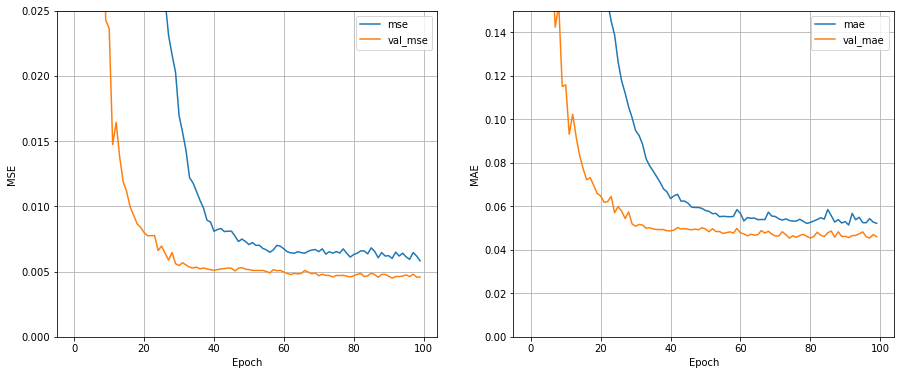

In [36]:
plot_loss(history)

In [37]:
print ("train set")
_ = evaluate_model(model, train_x, train_y)

train set
RMSE:   0.0701
R2:     0.6983
MAE:    0.0457


In [38]:
print ("Test set")
_ = evaluate_model(model, test_x, test_y)

Test set
RMSE:   0.0677
R2:     0.6264
MAE:    0.0460


## Cross Validated Score

In [39]:
y = data[goal_variable]
X = data.drop(goal_variable, axis = 1)

#X = MinMaxScaler().fit_transform(np.array(X))
X = np.array(X)
X = StandardScaler().fit_transform(X)

y = np.array(y)

print (X.shape, y.shape)

(1994, 102) (1994,)


In [40]:
kf = KFold(n_splits = 10,shuffle = True)
splits = kf.get_n_splits(X)

split = 0
maes = []
mses = []
r2s = []


for train_index, test_index in kf.split(X):
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
    
    model = create_model()
    model.fit(train_x, train_y, epochs = 100, shuffle = True, 
                                 batch_size = 64, verbose = 0)

    y_hat = model.predict(test_x).flatten()
    
    

    mse = mean_squared_error(test_y,y_hat)
    rmse = np.sqrt(mse)
    
    mae = mean_absolute_error(test_y,y_hat)
    
    r2 = r2_score(test_y, y_hat)
    
    print ("Split %d"%split)
    print ("R2 Score = %.4f, RMSE = %.4f,  MAE = %.4f" %(r2, rmse,mae))
    
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    
print ("\nMean Cross Validated MAE = %.4f" %(np.mean(maes)))
print ("\nMean MSE = %.4f" %(np.mean(mses)))
print ("\nMean R2 = %.4f" %(np.mean(r2s)))

Split 1
R2 Score = 0.7241, RMSE = 0.0550,  MAE = 0.0378
Split 2
R2 Score = 0.6015, RMSE = 0.1013,  MAE = 0.0566
Split 3
R2 Score = 0.6711, RMSE = 0.0804,  MAE = 0.0524
Split 4
R2 Score = 0.5743, RMSE = 0.0804,  MAE = 0.0530
Split 5
R2 Score = 0.6458, RMSE = 0.0746,  MAE = 0.0512
Split 6
R2 Score = 0.7083, RMSE = 0.0540,  MAE = 0.0409
Split 7
R2 Score = 0.6329, RMSE = 0.0811,  MAE = 0.0494
Split 8
R2 Score = 0.6639, RMSE = 0.0736,  MAE = 0.0517
Split 9
R2 Score = 0.4559, RMSE = 0.0810,  MAE = 0.0480
Split 10
R2 Score = 0.6728, RMSE = 0.0680,  MAE = 0.0462

Mean Cross Validated MAE = 0.0487

Mean MSE = 0.0058

Mean R2 = 0.6351


## NN with normalized target variable

0.1722658680617927


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


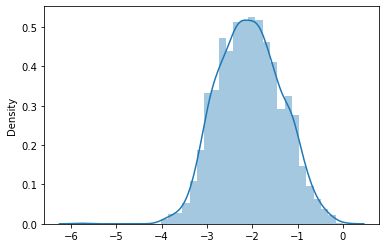

In [41]:
from scipy import stats
delta = 1e-16
fitted_data, fitted_lambda = stats.boxcox(data[goal_variable].values+delta)

print (fitted_lambda)
sns.distplot(fitted_data)

In [43]:
true_ys = data[goal_variable].values.copy()

y = (np.power((data[goal_variable] + delta),fitted_lambda) - 1)/fitted_lambda

X = data.drop(goal_variable, axis = 1)

#X = MinMaxScaler().fit_transform(np.array(X))
X = np.array(X)
X = StandardScaler().fit_transform(X)

y = np.array(y)

print (X.shape, y.shape)

(1994, 102) (1994,)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


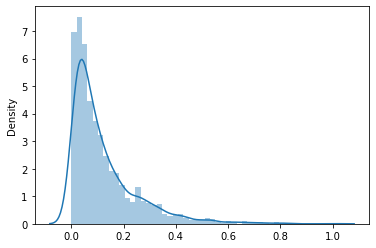

In [44]:
sns.distplot(true_ys)

In [46]:
kf = KFold(n_splits = 10, shuffle = True)
splits = kf.get_n_splits(X)

split = 0
maes = []
mses = []
r2s = []

for train_index, test_index in kf.split(X):
    split+=1
    
    train_x = X[train_index]
    train_y = y[train_index]
    
    
    train_y_true = true_ys[train_index]
    
    test_x = X[test_index]
    test_y = y[test_index]
    
   
    test_y_true = true_ys[test_index]
    
    
    model = create_model()
    model.fit(train_x, train_y, epochs = 100, shuffle = True, 
                                 batch_size = 64, verbose = 0)

    y_test_pred = model.predict(test_x).flatten()
    
    
    y_hat = np.exp(np.log((fitted_lambda * y_test_pred) + 1)/fitted_lambda) - delta


    mse = mean_squared_error(test_y_true,y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_y_true,y_hat)
    r2 = r2_score(test_y_true, y_hat)
    
    print ("Split %d"%split)
    print ("R2 Score = %.4f, RMSE = %.4f,  MAE = %.4f" %(r2, rmse,mae))
    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)
    
print ("\nMean Cross Validated MAE = %.4f" %(np.mean(maes)))
print ("\nMean MSE = %.4f" %(np.mean(mses)))
print ("\nMean R2 = %.4f" %(np.mean(r2s)))

Split 1
R2 Score = 0.6430, RMSE = 0.0730,  MAE = 0.0450
Split 2
R2 Score = 0.7034, RMSE = 0.0668,  MAE = 0.0445
Split 3
R2 Score = 0.5829, RMSE = 0.0868,  MAE = 0.0475
Split 4
R2 Score = 0.6353, RMSE = 0.0792,  MAE = 0.0460
Split 5
R2 Score = 0.6406, RMSE = 0.0697,  MAE = 0.0415
Split 6
R2 Score = 0.7575, RMSE = 0.0668,  MAE = 0.0416
Split 7
R2 Score = 0.6412, RMSE = 0.0734,  MAE = 0.0428
Split 8
R2 Score = 0.5462, RMSE = 0.0813,  MAE = 0.0499
Split 9
R2 Score = 0.5944, RMSE = 0.0799,  MAE = 0.0525
Split 10
R2 Score = 0.5820, RMSE = 0.0821,  MAE = 0.0464

Mean Cross Validated MAE = 0.0458

Mean MSE = 0.0058

Mean R2 = 0.6326
